In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# Read the CSV file
pinkFlam = pd.read_csv('catch_the_pink_flamingo.csv')

# Remove whitespaces from column headers
pinkFlam = pinkFlam.rename(columns=lambda x: x.strip())

# Fill missing values with the mean
# pinkFlam.fillna(pinkFlam.mean(), inplace=True)

# Print the count of samples with purchases and total samples
samples_with_purchases = pinkFlam['avg_price'].count()
total_samples = pinkFlam['userId'].count()
print('Samples with Purchases: ' + str(samples_with_purchases) + ' out of the total samples: ' + str(total_samples))


Samples with Purchases: 1411 out of the total samples: 4619


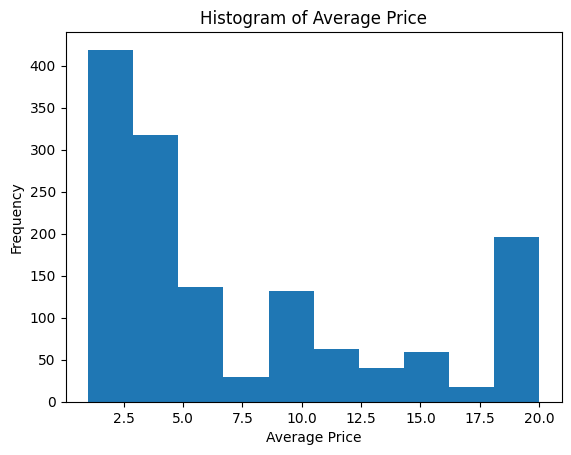

In [49]:
# Create a histogram
plt.hist(pinkFlam['avg_price'])

# Set the labels and title
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.title('Histogram of Average Price')

# Display the histogram
plt.show()


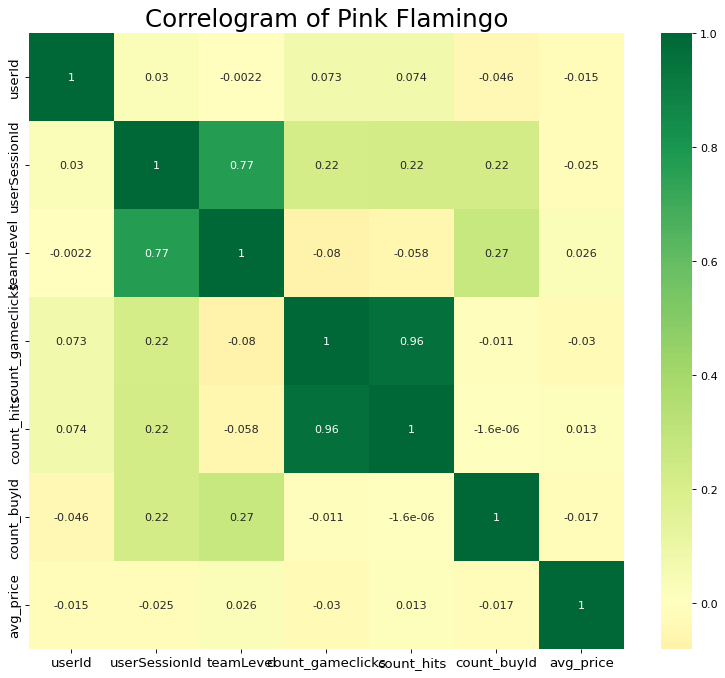

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size and DPI
plt.figure(figsize=(12, 10), dpi=80)

# Create the heatmap
sns.heatmap(pinkFlam.corr(), xticklabels=pinkFlam.corr().columns, yticklabels=pinkFlam.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of Pink Flamingo', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the heatmap
plt.show()


In [51]:
corr = pinkFlam.corr()
corr

,userId,userSessionId,teamLevel,count_gameclicks,count_hits,count_buyId,avg_price
userId,1.000000,0.030163,-0.002158,0.072707,0.073603,-0.045570,-0.015360
userSessionId,0.030163,1.000000,0.765534,0.216295,0.221440,0.219281,-0.024990
teamLevel,-0.002158,0.765534,1.000000,-0.080415,-0.058090,0.270753,0.025648
count_gameclicks,0.072707,0.216295,-0.080415,1.000000,0.959317,-0.010759,-0.030101
count_hits,0.073603,0.221440,-0.058090,0.959317,1.000000,-0.000002,0.013463
count_buyId,-0.045570,0.219281,0.270753,-0.010759,-0.000002,1.000000,-0.017451
avg_price,-0.015360,-0.024990,0.025648,-0.030101,0.013463,-0.017451,1.000000


In [52]:
#Determine pivot table
impute_grps = pinkFlam.pivot_table(values=["avg_price"], index=["platformType","count_gameclicks","count_hits"], aggfunc=len) # default aggfunc=np.mean
impute_grps.head()

avg_price
platformType count_gameclicks count_hits           
android      1                0                   2
             2                0                   3
                              1                   1
             3                0                   3
                              1                   1

In [53]:
# Replace empty strings with NaN
pinkFlam.replace("", np.nan, inplace=True)

# Remove rows with missing values in the 'count_buyId' column
pinkFlam = pinkFlam[np.isfinite(pinkFlam['count_buyId'])]

# Create a new column 'user_category' based on the 'avg_price' values
# If 'avg_price' is greater than 5, set 'user_category' as 'Spenders', otherwise set it as 'Savers'
pinkFlam['user_category'] = np.where(pinkFlam['avg_price'] > 5, 'Spenders', 'Savers')

# Drop the 'userId', 'userSessionId', and 'avg_price' columns from the DataFrame
pinkFlam = pinkFlam.drop(['userId', 'userSessionId', 'avg_price'], axis=1)

# Display the modified DataFrame
pinkFlam.head()


,teamLevel,platformType,count_gameclicks,count_hits,count_buyId,user_category
4,1,android,39,0,1.0,Savers
11,1,iphone,129,9,1.0,Spenders
13,1,android,102,14,1.0,Savers
17,1,android,39,4,1.0,Savers
18,1,android,90,10,1.0,Savers


In [54]:
# Group the DataFrame by 'platformType' and calculate the mean of each column
pinkFlam_grouped = pinkFlam.groupby('platformType').mean()

# Display the grouped DataFrame
pinkFlam_grouped


,teamLevel,count_gameclicks,count_hits,count_buyId
platformType,,,,
android,4.769981,144.284600,16.062378,1.654971
iphone,4.915315,142.816216,17.401802,1.684685
linux,4.354167,157.604167,17.510417,1.666667
mac,5.045455,165.090909,18.363636,1.613636
windows,4.955665,144.093596,16.054187,1.773399


In [55]:
# Import the required library
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
enc = LabelEncoder()

# Fit the LabelEncoder to the 'platformType' column
label_encoder = enc.fit(pinkFlam['platformType'])

# Print the categorical classes
print("Categorical classes:", label_encoder.classes_)

# Transform the categorical classes into integer classes
integer_classes = label_encoder.transform(label_encoder.classes_)

# Print the integer classes
print("Integer classes:", integer_classes)

# Transform the 'platformType' column into encoded values
t = label_encoder.transform(pinkFlam['platformType'])

# Create a new column 'EncPlatformType' with the encoded values
pinkFlam['EncPlatformType'] = t


Categorical classes: ['android' 'iphone' 'linux' 'mac' 'windows']
Integer classes: [0 1 2 3 4]


In [56]:
from sklearn import tree
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree classifier
clf = tree.DecisionTreeClassifier()

# Prepare the features and target variables
X = pinkFlam[['teamLevel', 'count_gameclicks', 'count_hits', 'count_buyId', 'EncPlatformType']][0:846]
Y = pinkFlam['user_category'][0:846]

# Train the Decision Tree classifier on the data
clf.fit(X, Y)

# Prepare the test data
X_test = pinkFlam[['teamLevel', 'count_gameclicks', 'count_hits', 'count_buyId', 'EncPlatformType']][846:1411]
Y_test = pinkFlam['user_category'][846:1411]

# Make predictions using the trained Decision Tree classifier
Y_prediction = clf.predict(X_test)

# Calculate the accuracy of the Decision Tree classifier
accuracy = accuracy_score(Y_test, Y_prediction)

# Print the accuracy of the Decision Tree classifier
print("Accuracy for Decision Tree:", accuracy)


Accuracy for Decision Tree: 0.7823008849557522


In [57]:
# Train the Decision Tree classifier on the data
clf.fit(X, Y)

# Prepare the test data
X_test = pinkFlam[['teamLevel', 'count_gameclicks', 'count_hits', 'count_buyId', 'EncPlatformType']][846:1411]

# Make predictions using the trained Decision Tree classifier
Y_prediction = clf.predict(X_test)

# Print the unique predicted categories
unique_categories = np.unique(Y_prediction)
print("Unique predicted categories:", unique_categories)

# Create a DataFrame for evaluation
pinkFlam_evaluation = pinkFlam[846:1411]
pinkFlam_evaluation['Predicted_UserCategory'] = Y_prediction

# Display the predicted and actual user categories
prediction_vs_actual = pinkFlam_evaluation[['Predicted_UserCategory', 'user_category']]
print(prediction_vs_actual)

# Calculate evaluation metrics
y_true = pinkFlam_evaluation['user_category']
y_pred = pinkFlam_evaluation['Predicted_UserCategory']

Unique predicted categories: ['Savers' 'Spenders']
     Predicted_UserCategory user_category
2978                 Savers        Savers
2981               Spenders      Spenders
2984                 Savers        Savers
2998                 Savers        Savers
2999               Spenders      Spenders
...                     ...           ...
4596                 Savers        Savers
4597               Spenders        Savers
4614                 Savers        Savers
4615               Spenders      Spenders
4616               Spenders      Spenders

[565 rows x 2 columns]


In [58]:
from sklearn.metrics import confusion_matrix

# Define the true labels and predicted labels for the confusion matrix
true_labels = [0, 1, 0, 1]
predicted_labels = [1, 1, 1, 0]

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Extract the values from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Print the values
print("True Negative:", tn)
print("False Positive:", fp)
print("False Negative:", fn)
print("True Positive:", tp)

True Negative: 0
False Positive: 2
False Negative: 1
True Positive: 1


In [61]:
import numpy as np

# Get the unique labels from the true labels
unique_labels = np.unique(y_true)

# Calculate the confusion matrix and create a DataFrame for display
confusion_mat = confusion_matrix(y_true, y_pred, labels=unique_labels)
confusion_df = pd.DataFrame(confusion_mat, 
                            index=['true:{:}'.format(x) for x in unique_labels], 
                            columns=['pred:{:}'.format(x) for x in unique_labels])

# Print the confusion matrix
print(confusion_df)


               pred:Savers  pred:Spenders
true:Savers            267             56
true:Spenders           70            172


Text(0.5, 23.52222222222222, 'Predicted User Category')

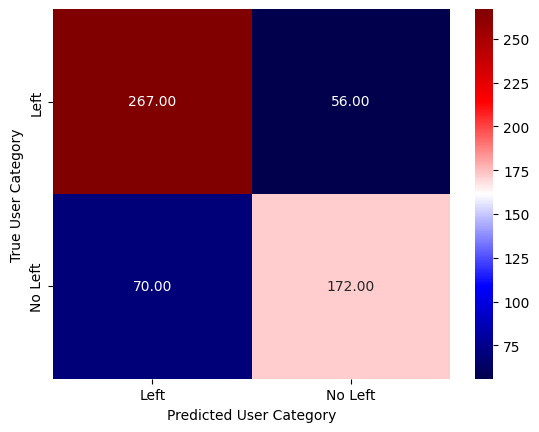

In [62]:
# Calculate the confusion matrix and create a DataFrame for display
cm = pd.DataFrame(confusion_matrix(y_true, y_pred, labels=unique_labels), 
                  index=['true:{:}'.format(x) for x in unique_labels], 
                  columns=['pred:{:}'.format(x) for x in unique_labels])

# Choose a colormap for the heatmap
cmap = 'seismic'  # Example: coolwarm

# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, fmt='.2f',
            xticklabels=["Left", "No Left"], yticklabels=["Left", "No Left"],
            cmap=cmap)

# Set labels for the axes
plt.ylabel('True User Category')
plt.xlabel('Predicted User Category')


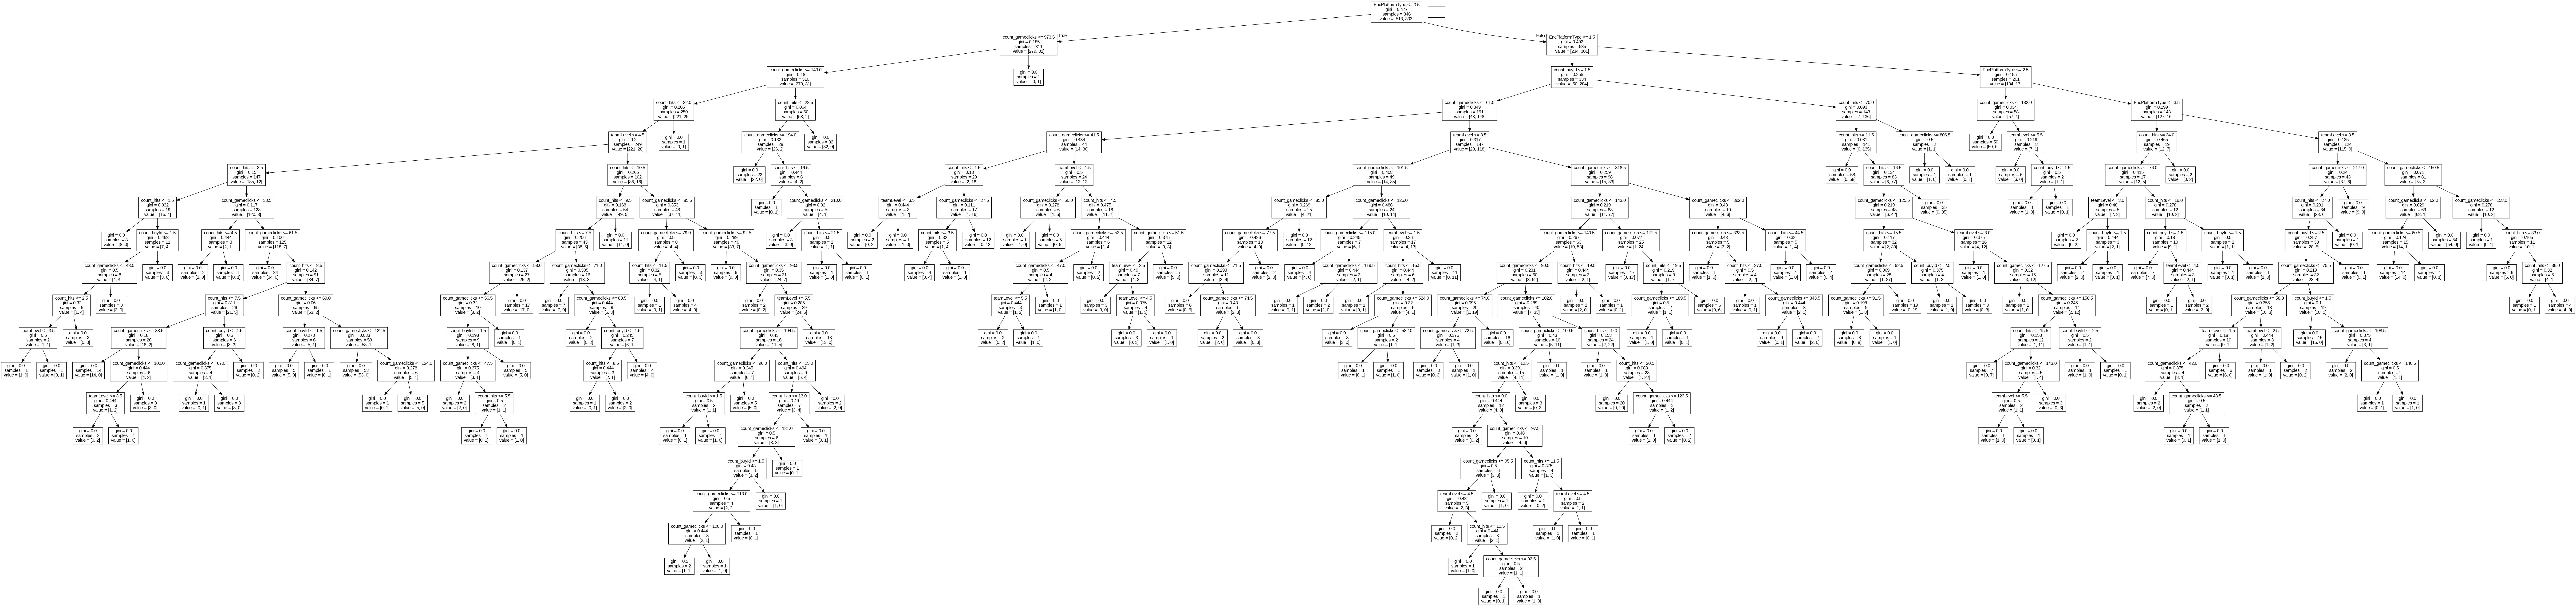

In [64]:
import pydotplus as pdot
from sklearn.tree import export_graphviz

# Export the decision tree as a DOT file
export_graphviz(clf,
                out_file="pinkFlamingo_tree.dot",
                feature_names=X.columns)

# Generate the tree graph from the DOT file
chd_tree_graph = pdot.graphviz.graph_from_dot_file('pinkFlamingo_tree.dot')

# Save the tree graph as an image file
chd_tree_graph.write_jpg('pinkFlamingo_tree.jpg')

from IPython.display import Image

# Display the tree image
Image(filename='pinkFlamingo_tree.jpg')
